In [ ]:
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [3]:
data = pd.read_csv("Salestrain.csv")["data"].values
data.shape

(96,)

In [4]:
model = auto_arima(data, seasonal=True, m=12, trace=False)

In [5]:
print(model.order)

(1, 1, 0)


In [6]:
model = ARIMA(data, order=model.order)
model_fit = model.fit()

In [7]:
resids = model_fit.resid

In [8]:
anomalies = np.where(np.abs(resids) > 2 * np.std(resids))[0]
anomalies

array([ 0, 62, 83, 89])

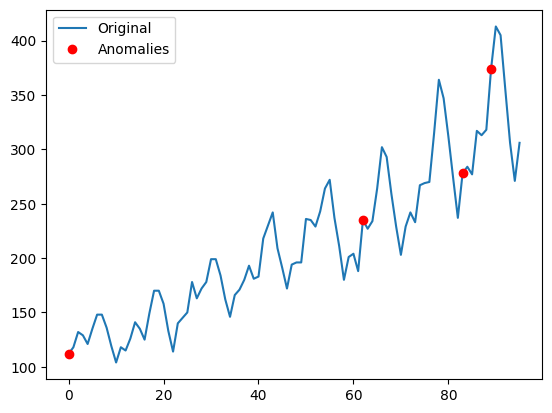

In [9]:
plt.plot(data, label="Original")
plt.plot(anomalies, data[anomalies], "ro", label="Anomalies")
plt.legend()
plt.show()